In [14]:
# Investigating Relationships using Correlation and Multivariate Linear Regression

In [3]:
library(car)
library(corrplot) # We'll use corrplot later on in this example too.
library(knitr)

Warning message:
"package 'car' was built under R version 3.4.2"Warning message:
"package 'corrplot' was built under R version 3.4.3"corrplot 0.84 loaded


ERROR: Error in library(visreg): there is no package called 'visreg'


In [2]:
# Load the data for investigation. I selected a number of columns from the original data, saving them in 'scatterplot.csv'.
data<- read.csv("C:\\Users\\Joy Basford\\Desktop\\scatterplot.csv")

In [4]:
# Check the data using the head() or str() commands. 
# You might also want to compute some basic statistic summaries to get a sense of the shape of the data, using summary().
head(data,5)
str(data)
summary(data)

ï..borough,tot_yo,neet,hb25,hb3544,pc_child_oow,low_sat
Barking and Dagenham,600,460,1133,5356,19.3,15.0
Barnet,292,220,1013,8017,9.4,14.9
Bexley,308,240,824,3040,13.4,14.3
Brent,560,240,997,9494,13.9,17.5
Bromley,486,360,895,3668,10.9,16.4


'data.frame':	32 obs. of  7 variables:
 $ ï..borough  : Factor w/ 32 levels "Barking and Dagenham",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ tot_yo      : int  600 292 308 560 486 313 923 489 673 446 ...
 $ neet        : int  460 220 240 240 360 190 400 350 440 520 ...
 $ hb25        : int  1133 1013 824 997 895 585 2053 1015 1480 1288 ...
 $ hb3544      : int  5356 8017 3040 9494 3668 5278 8475 8439 9453 5678 ...
 $ pc_child_oow: num  19.3 9.4 13.4 13.9 10.9 16.6 14.8 13.2 18 17.5 ...
 $ low_sat     : num  15 14.9 14.3 17.5 16.4 16 15.3 15.9 15 14.9 ...


                ï..borough     tot_yo           neet            hb25       
 Barking and Dagenham: 1   Min.   : 87.0   Min.   : 60.0   Min.   : 366.0  
 Barnet              : 1   1st Qu.:303.2   1st Qu.:167.5   1st Qu.: 575.8  
 Bexley              : 1   Median :409.0   Median :230.0   Median : 953.0  
 Brent               : 1   Mean   :425.4   Mean   :245.9   Mean   : 953.9  
 Bromley             : 1   3rd Qu.:570.0   3rd Qu.:312.5   3rd Qu.:1189.8  
 Camden              : 1   Max.   :923.0   Max.   :520.0   Max.   :2053.0  
 (Other)             :26                                                   
     hb3544      pc_child_oow      low_sat     
 Min.   :1883   Min.   : 5.70   Min.   :10.70  
 1st Qu.:3738   1st Qu.:10.88   1st Qu.:14.70  
 Median :5508   Median :14.35   Median :15.30  
 Mean   :5879   Mean   :14.50   Mean   :15.31  
 3rd Qu.:8122   3rd Qu.:17.62   3rd Qu.:16.10  
 Max.   :9494   Max.   :24.00   Max.   :19.10  
                                               

In [5]:
# Create a new dataframe and reference the columns for the scatterplot, i.e. all columns except 'borough'
# Check this using summary().
newdata = data[,c(2:7)]
summary(newdata)

     tot_yo           neet            hb25            hb3544    
 Min.   : 87.0   Min.   : 60.0   Min.   : 366.0   Min.   :1883  
 1st Qu.:303.2   1st Qu.:167.5   1st Qu.: 575.8   1st Qu.:3738  
 Median :409.0   Median :230.0   Median : 953.0   Median :5508  
 Mean   :425.4   Mean   :245.9   Mean   : 953.9   Mean   :5879  
 3rd Qu.:570.0   3rd Qu.:312.5   3rd Qu.:1189.8   3rd Qu.:8122  
 Max.   :923.0   Max.   :520.0   Max.   :2053.0   Max.   :9494  
  pc_child_oow      low_sat     
 Min.   : 5.70   Min.   :10.70  
 1st Qu.:10.88   1st Qu.:14.70  
 Median :14.35   Median :15.30  
 Mean   :14.50   Mean   :15.31  
 3rd Qu.:17.62   3rd Qu.:16.10  
 Max.   :24.00   Max.   :19.10  

In [10]:
# given different scales in the columns, you should think about transforming the data to normalize before computing.
# One way is to create center predictors out of the selected columns.

neet.c = scale(newdata$neet, center=TRUE, scale=FALSE)
lowsat.c = scale(newdata$low_sat, center = TRUE, scale = FALSE)
oow.c = scale(newdata$pc_child_oow, center = TRUE, scale = FALSE)
hb25.c = scale(newdata$hb25, center = TRUE, scale = FALSE)
hb3544.c = scale(newdata$hb3544, center = TRUE, scale = FALSE)

In [11]:
# bind these new variables into newdata and display a summary.
new.c.vars = cbind(neet.c, lowsat.c, oow.c, hb25.c, hb3544.c)
newdata = cbind(newdata, new.c.vars)
names(newdata)[3:7] = c("neet.c", "lowsat.c", "oow.c", "hb25.c","hb3544.c" )

In [15]:
# build a Multivariate Linear Regression Model (mod1) and display results summary
mod1 = lm(tot_yo ~ neet.c + lowsat.c + oow.c + hb25.c + hb3544.c, data=newdata)
summary(mod1)


Call:
lm(formula = tot_yo ~ neet.c + lowsat.c + oow.c + hb25.c + hb3544.c, 
    data = newdata)

Residuals:
     Min       1Q   Median       3Q      Max 
-244.299  -28.043    4.843   36.619  186.239 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -5.120e+02  1.674e+02  -3.059  0.00510 **
neet.c       2.361e-01  6.463e-02   3.653  0.00115 **
lowsat.c     9.422e-03  1.093e-02   0.862  0.39653   
oow.c        5.321e+00  5.284e+00   1.007  0.32320   
hb25.c       3.786e+01  1.216e+01   3.112  0.00447 **
hb3544.c     3.540e-01  1.575e-01   2.247  0.03332 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 90.16 on 26 degrees of freedom
Multiple R-squared:  0.838,	Adjusted R-squared:  0.8069 
F-statistic:  26.9 on 5 and 26 DF,  p-value: 1.675e-09


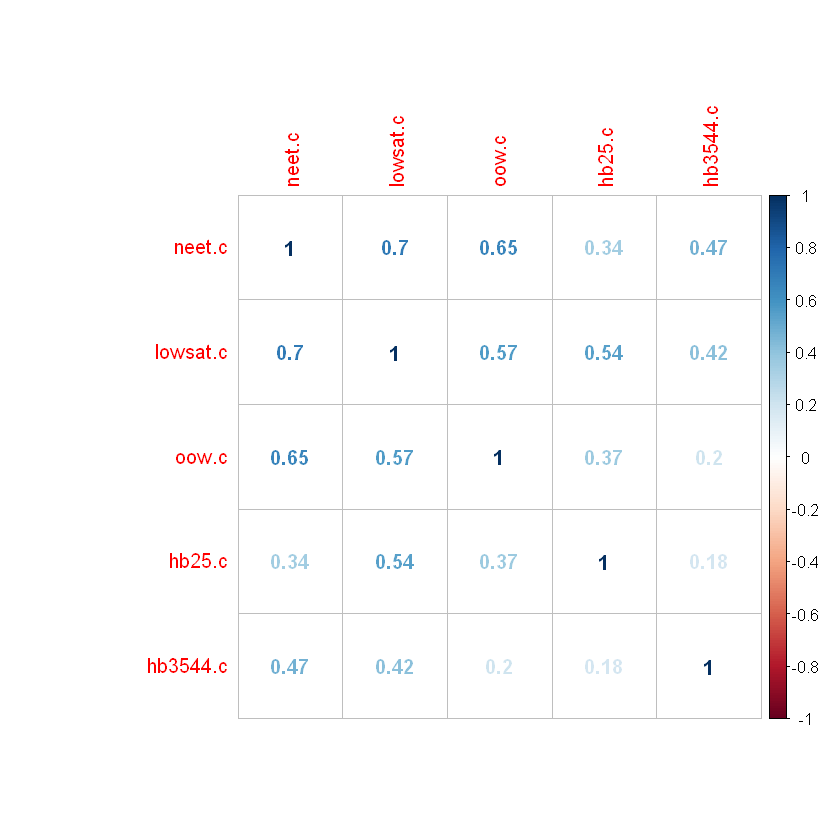

In [16]:
# A good model should only use the most salient variables, to avoid multicollinearity.
# This is when one or more variables can be linearly predicted from each other.
# An easy way to check is to plot a correlation matrix of the variables.
newdatacor = cor(newdata[3:7])
corrplot(newdatacor, method = "number")